In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import seaborn as sns


In [4]:
data=pd.read_csv('/Users/mk1000259016/Desktop/Niharika/ISIC_2019_Training_Metadata.csv')

In [5]:
data=data.drop(columns=['lesion_id'])

In [6]:
data.head()

,image,age_approx,anatom_site_general,sex,DK
0,ISIC_0000000,55.0,anterior torso,female,NV
1,ISIC_0000001,30.0,anterior torso,female,NV
2,ISIC_0000002,60.0,upper extremity,female,MEL
3,ISIC_0000003,30.0,upper extremity,male,NV
4,ISIC_0000004,80.0,posterior torso,male,MEL


In [7]:
data.isnull().sum()

image                     0
age_approx              437
anatom_site_general    2631
sex                     384
DK                        0
dtype: int64

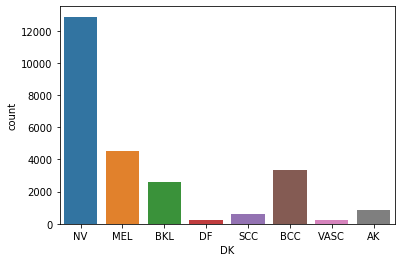

In [7]:
sns.countplot(data['DK'])

In [8]:
data['DK'].value_counts()

NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: DK, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

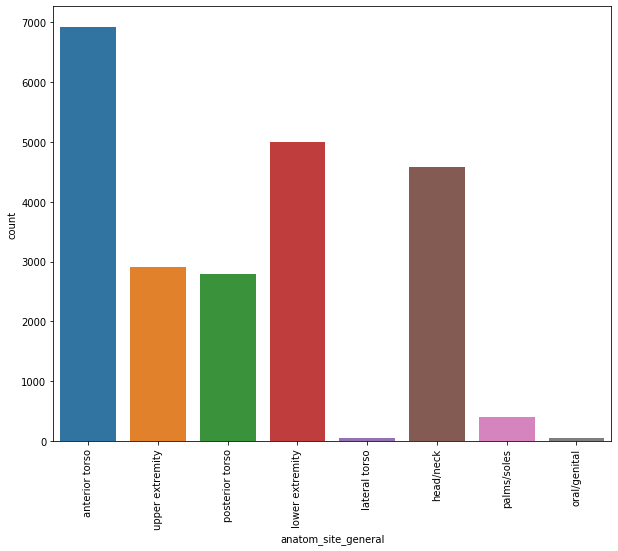

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data['anatom_site_general'])
plt.xticks(rotation=90)

In [9]:
data.isna().sum().sort_values(ascending=False)

anatom_site_general    2631
age_approx              437
sex                     384
DK                        0
image                     0
dtype: int64

In [10]:
print(data['age_approx'].mean())
print(data['age_approx'].median())
data['age_approx'].fillna(data['age_approx'].mean(),inplace=True)

54.02848075841568
55.0


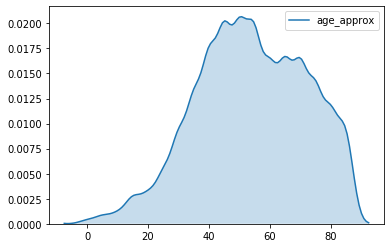

In [11]:
sns.kdeplot(data['age_approx'],shade=True)

In [12]:
data['sex'].value_counts()

male      13286
female    11661
Name: sex, dtype: int64

In [13]:
lesion_type_dict = {
    
    'MEL': 'Melanoma',
    'NV': 'Melanocytic nevus',
    'BCC': 'Basal cell carcinoma',
    'AK': 'Actinic keratosis',
    'BKL': 'Benign keratosis / seborrheic keratosis',
    'DF': 'Dermatofibroma',
    'VASC': 'Vascular lesion',
    'SCC': "Squamous cell carcinoma",
    'UNK': 'out of distribution' 
}

lesion_classes_dict = {
    0:'MEL',
    1:'NV',
    2:'BCC',
    3:'AK',
    4:'BKL',
    5:'DF',
    6:'VASC',
    7:'SCC',
    8:'UNK'
}

data['cell_type'] = data['DK'].map(lesion_type_dict)



In [14]:
data['cell_type_idx'] = pd.Categorical(data['cell_type']).codes


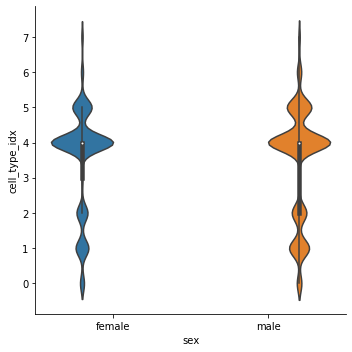

In [15]:
sns.catplot(x="sex", y="cell_type_idx",
                    hue="sex",
                    data=data,
                    kind="violin")

In [16]:
from glob import glob

In [17]:
src="/Users/mk1000259016/Desktop/Niharika/ISIC_2019_Training_Input"
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(src, '*.jpg'))}

In [18]:
data['path'] = data['image'].map(image_path.get)
data.head()

,image,age_approx,anatom_site_general,sex,DK,cell_type,cell_type_idx,path
0,ISIC_0000000,55.0,anterior torso,female,NV,Melanocytic nevus,4,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...
1,ISIC_0000001,30.0,anterior torso,female,NV,Melanocytic nevus,4,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...
2,ISIC_0000002,60.0,upper extremity,female,MEL,Melanoma,5,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...
3,ISIC_0000003,30.0,upper extremity,male,NV,Melanocytic nevus,4,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...
4,ISIC_0000004,80.0,posterior torso,male,MEL,Melanoma,5,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...


In [19]:
from PIL import Image
image_example = np.asarray(Image.open(data['path'][0]))

In [20]:
image_example.shape


(767, 1022, 3)

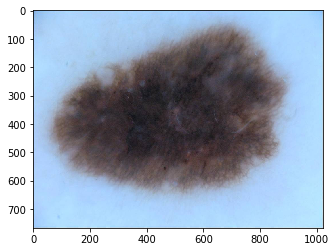

In [21]:
plt.imshow(image_example)

In [22]:
from PIL import Image
data['image_id'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((120,90))))

In [23]:
data.head()

,image,age_approx,anatom_site_general,sex,DK,cell_type,cell_type_idx,path,image_id
0,ISIC_0000000,55.0,anterior torso,female,NV,Melanocytic nevus,4,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...,"[[[146, 178, 227], [151, 179, 226], [143, 190,..."
1,ISIC_0000001,30.0,anterior torso,female,NV,Melanocytic nevus,4,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...,"[[[124, 123, 131], [133, 132, 140], [137, 134,..."
2,ISIC_0000002,60.0,upper extremity,female,MEL,Melanoma,5,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...,"[[[4, 4, 4], [8, 8, 8], [6, 6, 6], [6, 6, 6], ..."
3,ISIC_0000003,30.0,upper extremity,male,NV,Melanocytic nevus,4,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...,"[[[218, 217, 223], [218, 217, 223], [217, 217,..."
4,ISIC_0000004,80.0,posterior torso,male,MEL,Melanoma,5,/Users/mk1000259016/Desktop/Niharika/ISIC_2019...,"[[[6, 6, 6], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."


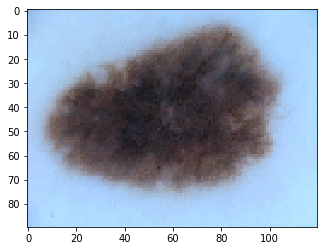

In [24]:

plt.imshow(data['image_id'][0])

In [25]:
data['image_id'][0].shape

(90, 120, 3)

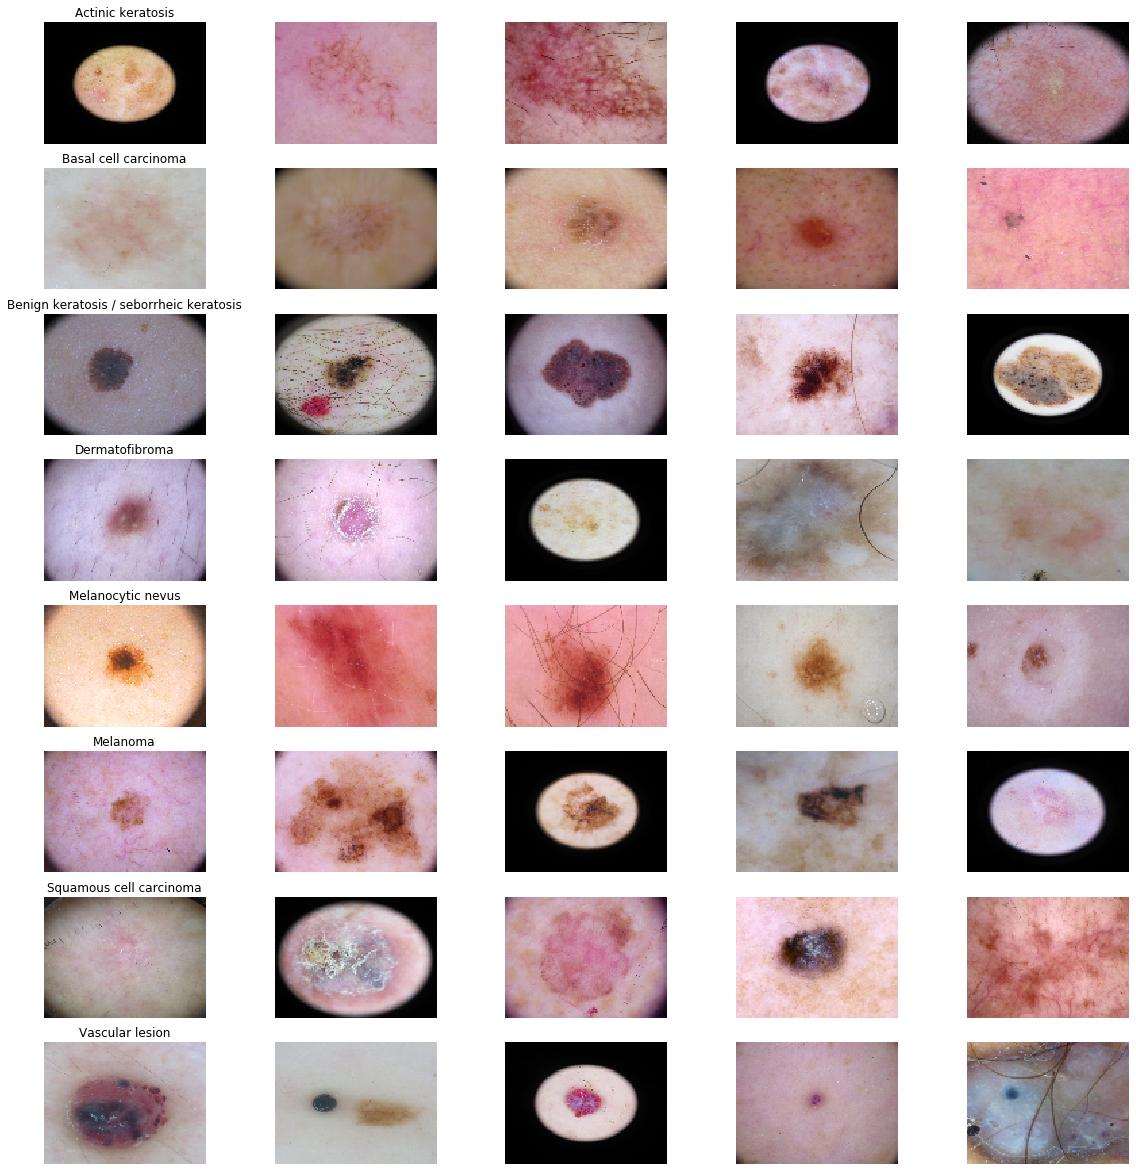

In [26]:
fig,axes = plt.subplots(8,5,figsize=(20,21))
for nth_axis,(cell_type_name,cell_type_row) in zip(axes,data.sort_values(['cell_type']).groupby('cell_type')):
    nth_axis[0].set_title(cell_type_name)
    for column_axis,(_,column_row) in zip(nth_axis,cell_type_row.sample(5).iterrows()):
        column_axis.imshow(column_row['image_id'])  
        column_axis.axis('off')

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
features = data.drop(['cell_type_idx'],axis=1)

target = data['cell_type_idx']

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(features,target,test_size=0.01)

In [29]:
x_train = np.asarray(X_TRAIN['image_id'].tolist())
x_test = np.asarray(X_TEST['image_id'].tolist())

In [30]:
print(x_train.shape)
print(x_test.shape)

(25077, 90, 120, 3)
(254, 90, 120, 3)


In [31]:
train_mean = x_train.mean()
train_std = x_train.std()
test_mean = x_test.mean()
test_std = x_test.std()

In [32]:
print(train_mean)
print(train_std)
print(test_mean)
print(test_std)

146.41326987938876
57.21999768879025
142.58369361815883
59.01957063500834


In [33]:
x_train = (x_train-train_mean) / train_std
x_test = (x_test-test_mean) / test_std

In [34]:
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(25077,)
(254,)


In [35]:
import numpy as np
from keras.utils import to_categorical
y_train = to_categorical(Y_TRAIN,num_classes=9)
y_test = to_categorical(Y_TEST,num_classes=9)

Using TensorFlow backend.


In [36]:
print(y_train.shape)
print(y_test.shape)

(25077, 9)
(254, 9)


In [37]:
X_train,X_val, Y_train,Y_val = train_test_split(x_train,y_train,test_size=0.15)

In [38]:
X_train  = X_train.reshape(X_train.shape[0],90,120,3)
x_test  = x_test.reshape(x_test.shape[0],90,120,3)
X_val  = X_val.reshape(X_val.shape[0],90,120,3)

In [39]:
print(X_train.shape)
print(x_test.shape)
print(X_val.shape)

(21315, 90, 120, 3)
(254, 90, 120, 3)
(3762, 90, 120, 3)


In [40]:
#from keras.utils.visualize_util import to_graph
from keras.models import Sequential
#from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
input_shape = (90, 120, 3)
num_classes = 9

model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),activation='relu',name="conv1", input_shape=input_shape)) #88,118
model.add(BatchNormalization(name="Norm1"))
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu',name="Conv2")) #86,116
model.add(BatchNormalization(name="Norm2"))
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu',name="Conv3")) #84,114
model.add(BatchNormalization(name="Norm3"))
model.add(MaxPooling2D(pool_size = (2, 2))) # 42,57
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',name="conv4")) #40,55
model.add(BatchNormalization(name="Norm4"))
model.add(Conv2D(128, (3, 3), activation='relu',name="conv5")) #38,53
model.add(BatchNormalization(name="Norm5"))
model.add(Conv2D(128, (3, 3), activation='relu',name="conv6")) #36,51
model.add(BatchNormalization(name="Norm6"))
model.add(MaxPooling2D(pool_size=(2, 2))) #18,25
model.add(Dropout(0.20))

model.add(Conv2D(128, (3, 3), activation='relu',name="conv7")) #16,23
model.add(BatchNormalization(name="Norm7"))
model.add(Conv2D(256, (3, 3), activation='relu',name="conv8")) #14,21
model.add(BatchNormalization(name="Norm8"))
model.add(Conv2D(256, (3, 3), activation='relu',name="conv9")) #12,19
model.add(BatchNormalization(name="Norm9"))
model.add(MaxPooling2D(pool_size=(2, 2))) #6,9
model.add(Dropout(0.20))

model.add(Conv2D(9,(1,1),name="conv10",activation="relu")) #6,9
model.add(BatchNormalization(name="Norm10"))
model.add(Conv2D(9,kernel_size=(6,9),name="conv11"))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [41]:
# Compile the model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [46]:
from keras.callbacks import ReduceLROnPlateau
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.0001, 
                                            min_lr=0.000001)

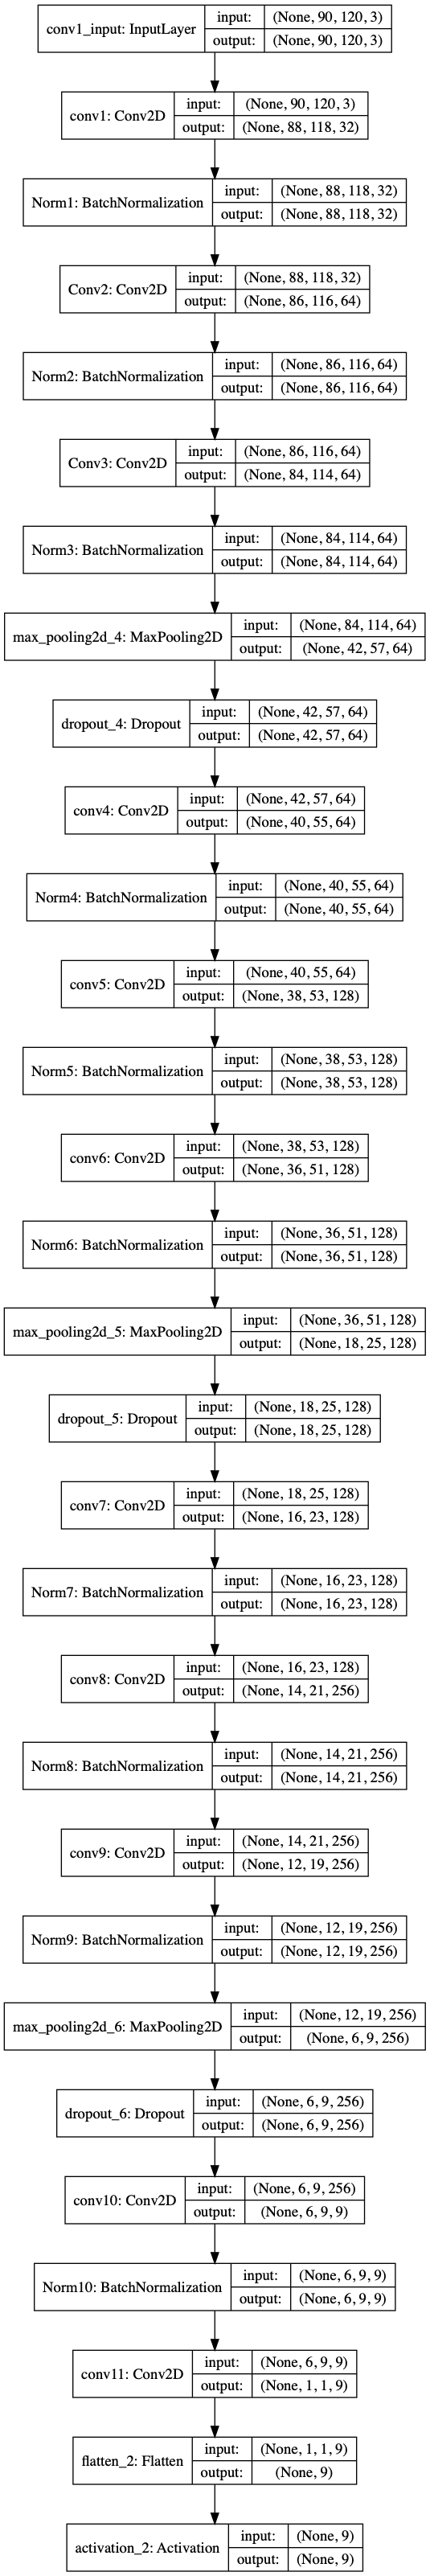

In [58]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image

#keras.utils.vis_utils.pydot = pydot

#plot_model(model, to_file='./simple_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename="./simple_model_plot.png")



Epoch 1/6
1332/1332 [==============================] - 3684s - loss: 1.1608 - acc: 0.5816 - val_loss: 1.1695 - val_acc: 0.5864
Epoch 2/6
1332/1332 [==============================] - 3673s - loss: 1.1117 - acc: 0.5972 - val_loss: 1.1544 - val_acc: 0.5688
Epoch 3/6
1332/1332 [==============================] - 3112s - loss: 1.0837 - acc: 0.6039 - val_loss: 1.0875 - val_acc: 0.5981
Epoch 4/6
1332/1332 [==============================] - 3056s - loss: 1.0621 - acc: 0.6125 - val_loss: 1.0862 - val_acc: 0.5976
Epoch 5/6
1332/1332 [==============================] - 2783s - loss: 1.0480 - acc: 0.6183 - val_loss: 1.0552 - val_acc: 0.6093
Epoch 6/6
1332/1332 [==============================] - 3140s - loss: 1.0205 - acc: 0.6263 - val_loss: 1.0532 - val_acc: 0.6045
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


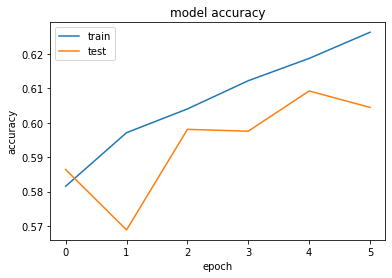

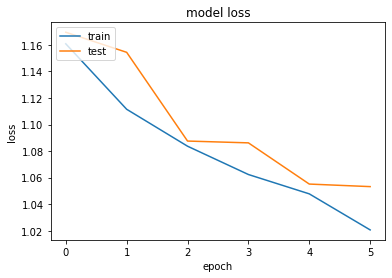

AttributeError: 'Sequential' object has no attribute 'history'

In [49]:
#from keras.callbacks import History
#from keras.callbacks import History

# With data augmentation to prevent overfitting 

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1 # Randomly zoom image 
)

epochs = 6
batch_size = 16
history=model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                             verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                            , callbacks=[learning_rate_reduction])

#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("MAXIMUM ACCURACY OF SIMPLE SEQUENTIAL NETWORK is : ", round(max(model.history.history['val_acc'])*100,4))


In [60]:
import urllib
from PIL import Image
import os
import csv



path = "/Users/mk1000259016/Desktop/Niharika/ISIC_2019_Test_Input"

files = []
totalFile = 0
for r, d, f in os.walk(path):
    for file in f:
        if ".txt" in file  :
               continue
        files.append("/Users/mk1000259016/Desktop/Niharika/ISIC_2019_Test_Input/"+file)
        totalFile= totalFile + 1

with open('./Desktop/Niharika/skin_cancer_detection.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    #way to write to csv file
    writer.writerow(['image','MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK'])
    
    for f in files:
        x = Image.open(f)

        test_image =  np.asarray(x)

        #print('Original Shape of image is : ',test_image.shape)
        #plt.imshow(test_image)

        resized_image = np.asarray(x.resize((120,90)))
        image_array = np.asarray(resized_image.tolist())
        test_image = image_array.reshape(1,90,120,3)

        prediction_class = model.predict_classes(test_image)
        disease = lesion_classes_dict[prediction_class[0]]
        if (disease == "MEL"):
            writer.writerow([f,1,0,0,0,0,0,0,0,0])
        elif (disease == "NV"):
            writer.writerow([f,0,1,0,0,0,0,0,0,0])
        
        elif (disease == "BCC"):
            writer.writerow([f,0,0,1,0,0,0,0,0,0])
            
        elif (disease == "AK"):
            writer.writerow([f,0,0,0,1,0,0,0,0,0])
        
        elif (disease == "BKL"):
            writer.writerow([f,0,0,0,0,1,0,0,0,0])
        
        elif (disease == "DF"):
            writer.writerow([f,0,0,0,0,0,1,0,0,0])
        
        elif (disease == "VASC"):
            writer.writerow([f,0,0,0,0,0,0,1,0,0])
        
        elif (disease == "SCC"):
            writer.writerow([f,0,0,0,0,0,0,0,1,0])
        
        elif (disease == "UNK"):
            writer.writerow([f,0,0,0,0,0,0,0,0,1])
            
        totalFile = totalFile - 1
        print("Remaining record to process ", totalFile)
            
            
print('done')
            

1/1 [==============================] - 0s
Remaining record to process  8237
1/1 [==============================] - 0s
Remaining record to process  8236
1/1 [==============================] - 0s
Remaining record to process  8235
1/1 [==============================] - 0s
Remaining record to process  8234
1/1 [==============================] - 0s
Remaining record to process  8233
1/1 [==============================] - 0s
Remaining record to process  8232
1/1 [==============================] - 0s
Remaining record to process  8231
1/1 [==============================] - 0s
Remaining record to process  8230
1/1 [==============================] - 0s
Remaining record to process  8229
1/1 [==============================] - 0s
Remaining record to process  8228
1/1 [==============================] - 0s
Remaining record to process  8227
1/1 [==============================] - 0s
Remaining record to process  8226
1/1 [==============================] - 0s
Remaining record to process  8225
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  8129
1/1 [==============================] - 0s
Remaining record to process  8128
1/1 [==============================] - 0s
Remaining record to process  8127
1/1 [==============================] - 0s
Remaining record to process  8126
1/1 [==============================] - 0s
Remaining record to process  8125
1/1 [==============================] - 0s
Remaining record to process  8124
1/1 [==============================] - 0s
Remaining record to process  8123
1/1 [==============================] - 0s
Remaining record to process  8122
1/1 [==============================] - 0s
Remaining record to process  8121
1/1 [==============================] - 0s
Remaining record to process  8120
1/1 [==============================] - 0s
Remaining record to process  8119
1/1 [==============================] - 0s
Remaining record to process  8118
1/1 [==============================] - 0s
Remaining record to process  8117
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  8021
1/1 [==============================] - 0s
Remaining record to process  8020
1/1 [==============================] - 0s
Remaining record to process  8019
1/1 [==============================] - 0s
Remaining record to process  8018
1/1 [==============================] - 0s
Remaining record to process  8017
1/1 [==============================] - 0s
Remaining record to process  8016
1/1 [==============================] - 0s
Remaining record to process  8015
1/1 [==============================] - 0s
Remaining record to process  8014
1/1 [==============================] - 0s
Remaining record to process  8013
1/1 [==============================] - 0s
Remaining record to process  8012
1/1 [==============================] - 0s
Remaining record to process  8011
1/1 [==============================] - 0s
Remaining record to process  8010
1/1 [==============================] - 0s
Remaining record to process  8009
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7913
1/1 [==============================] - 0s
Remaining record to process  7912
1/1 [==============================] - 0s
Remaining record to process  7911
1/1 [==============================] - 0s
Remaining record to process  7910
1/1 [==============================] - 0s
Remaining record to process  7909
1/1 [==============================] - 0s
Remaining record to process  7908
1/1 [==============================] - 0s
Remaining record to process  7907
1/1 [==============================] - 0s
Remaining record to process  7906
1/1 [==============================] - 0s
Remaining record to process  7905
1/1 [==============================] - 0s
Remaining record to process  7904
1/1 [==============================] - 0s
Remaining record to process  7903
1/1 [==============================] - 0s
Remaining record to process  7902
1/1 [==============================] - 0s
Remaining record to process  7901
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7805
1/1 [==============================] - 0s
Remaining record to process  7804
1/1 [==============================] - 0s
Remaining record to process  7803
1/1 [==============================] - 0s
Remaining record to process  7802
1/1 [==============================] - 0s
Remaining record to process  7801
1/1 [==============================] - 0s
Remaining record to process  7800
1/1 [==============================] - 0s
Remaining record to process  7799
1/1 [==============================] - 0s
Remaining record to process  7798
1/1 [==============================] - 0s
Remaining record to process  7797
1/1 [==============================] - 0s
Remaining record to process  7796
1/1 [==============================] - 0s
Remaining record to process  7795
1/1 [==============================] - 0s
Remaining record to process  7794
1/1 [==============================] - 0s
Remaining record to process  7793
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7697
1/1 [==============================] - 0s
Remaining record to process  7696
1/1 [==============================] - 0s
Remaining record to process  7695
1/1 [==============================] - 0s
Remaining record to process  7694
1/1 [==============================] - 0s
Remaining record to process  7693
1/1 [==============================] - 0s
Remaining record to process  7692
1/1 [==============================] - 0s
Remaining record to process  7691
1/1 [==============================] - 0s
Remaining record to process  7690
1/1 [==============================] - 0s
Remaining record to process  7689
1/1 [==============================] - 0s
Remaining record to process  7688
1/1 [==============================] - 0s
Remaining record to process  7687
1/1 [==============================] - 0s
Remaining record to process  7686
1/1 [==============================] - 0s
Remaining record to process  7685
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7589
1/1 [==============================] - 0s
Remaining record to process  7588
1/1 [==============================] - 0s
Remaining record to process  7587
1/1 [==============================] - 0s
Remaining record to process  7586
1/1 [==============================] - 0s
Remaining record to process  7585
1/1 [==============================] - 0s
Remaining record to process  7584
1/1 [==============================] - 0s
Remaining record to process  7583
1/1 [==============================] - 0s
Remaining record to process  7582
1/1 [==============================] - 0s
Remaining record to process  7581
1/1 [==============================] - 0s
Remaining record to process  7580
1/1 [==============================] - 0s
Remaining record to process  7579
1/1 [==============================] - 0s
Remaining record to process  7578
1/1 [==============================] - 0s
Remaining record to process  7577
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7481
1/1 [==============================] - 0s
Remaining record to process  7480
1/1 [==============================] - 0s
Remaining record to process  7479
1/1 [==============================] - 0s
Remaining record to process  7478
1/1 [==============================] - 0s
Remaining record to process  7477
1/1 [==============================] - 0s
Remaining record to process  7476
1/1 [==============================] - 0s
Remaining record to process  7475
1/1 [==============================] - 0s
Remaining record to process  7474
1/1 [==============================] - 0s
Remaining record to process  7473
1/1 [==============================] - 0s
Remaining record to process  7472
1/1 [==============================] - 0s
Remaining record to process  7471
1/1 [==============================] - 0s
Remaining record to process  7470
1/1 [==============================] - 0s
Remaining record to process  7469
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7373
1/1 [==============================] - 0s
Remaining record to process  7372
1/1 [==============================] - 0s
Remaining record to process  7371
1/1 [==============================] - 0s
Remaining record to process  7370
1/1 [==============================] - 0s
Remaining record to process  7369
1/1 [==============================] - 0s
Remaining record to process  7368
1/1 [==============================] - 0s
Remaining record to process  7367
1/1 [==============================] - 0s
Remaining record to process  7366
1/1 [==============================] - 0s
Remaining record to process  7365
1/1 [==============================] - 0s
Remaining record to process  7364
1/1 [==============================] - 0s
Remaining record to process  7363
1/1 [==============================] - 0s
Remaining record to process  7362
1/1 [==============================] - 0s
Remaining record to process  7361
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7265
1/1 [==============================] - 0s
Remaining record to process  7264
1/1 [==============================] - 0s
Remaining record to process  7263
1/1 [==============================] - 0s
Remaining record to process  7262
1/1 [==============================] - 0s
Remaining record to process  7261
1/1 [==============================] - 0s
Remaining record to process  7260
1/1 [==============================] - 0s
Remaining record to process  7259
1/1 [==============================] - 0s
Remaining record to process  7258
1/1 [==============================] - 0s
Remaining record to process  7257
1/1 [==============================] - 0s
Remaining record to process  7256
1/1 [==============================] - 0s
Remaining record to process  7255
1/1 [==============================] - 0s
Remaining record to process  7254
1/1 [==============================] - 0s
Remaining record to process  7253
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7157
1/1 [==============================] - 0s
Remaining record to process  7156
1/1 [==============================] - 0s
Remaining record to process  7155
1/1 [==============================] - 0s
Remaining record to process  7154
1/1 [==============================] - 0s
Remaining record to process  7153
1/1 [==============================] - 0s
Remaining record to process  7152
1/1 [==============================] - 0s
Remaining record to process  7151
1/1 [==============================] - 0s
Remaining record to process  7150
1/1 [==============================] - 0s
Remaining record to process  7149
1/1 [==============================] - 0s
Remaining record to process  7148
1/1 [==============================] - 0s
Remaining record to process  7147
1/1 [==============================] - 0s
Remaining record to process  7146
1/1 [==============================] - 0s
Remaining record to process  7145
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  7049
1/1 [==============================] - 0s
Remaining record to process  7048
1/1 [==============================] - 0s
Remaining record to process  7047
1/1 [==============================] - 0s
Remaining record to process  7046
1/1 [==============================] - 0s
Remaining record to process  7045
1/1 [==============================] - 0s
Remaining record to process  7044
1/1 [==============================] - 0s
Remaining record to process  7043
1/1 [==============================] - 0s
Remaining record to process  7042
1/1 [==============================] - 0s
Remaining record to process  7041
1/1 [==============================] - 0s
Remaining record to process  7040
1/1 [==============================] - 0s
Remaining record to process  7039
1/1 [==============================] - 0s
Remaining record to process  7038
1/1 [==============================] - 0s
Remaining record to process  7037
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6941
1/1 [==============================] - 0s
Remaining record to process  6940
1/1 [==============================] - 0s
Remaining record to process  6939
1/1 [==============================] - 0s
Remaining record to process  6938
1/1 [==============================] - 0s
Remaining record to process  6937
1/1 [==============================] - 0s
Remaining record to process  6936
1/1 [==============================] - 0s
Remaining record to process  6935
1/1 [==============================] - 0s
Remaining record to process  6934
1/1 [==============================] - 0s
Remaining record to process  6933
1/1 [==============================] - 0s
Remaining record to process  6932
1/1 [==============================] - 0s
Remaining record to process  6931
1/1 [==============================] - 0s
Remaining record to process  6930
1/1 [==============================] - 0s
Remaining record to process  6929
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6833
1/1 [==============================] - 0s
Remaining record to process  6832
1/1 [==============================] - 0s
Remaining record to process  6831
1/1 [==============================] - 0s
Remaining record to process  6830
1/1 [==============================] - 0s
Remaining record to process  6829
1/1 [==============================] - 0s
Remaining record to process  6828
1/1 [==============================] - 0s
Remaining record to process  6827
1/1 [==============================] - 0s
Remaining record to process  6826
1/1 [==============================] - 0s
Remaining record to process  6825
1/1 [==============================] - 0s
Remaining record to process  6824
1/1 [==============================] - 0s
Remaining record to process  6823
1/1 [==============================] - 0s
Remaining record to process  6822
1/1 [==============================] - 0s
Remaining record to process  6821
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6725
1/1 [==============================] - 0s
Remaining record to process  6724
1/1 [==============================] - 0s
Remaining record to process  6723
1/1 [==============================] - 0s
Remaining record to process  6722
1/1 [==============================] - 0s
Remaining record to process  6721
1/1 [==============================] - 0s
Remaining record to process  6720
1/1 [==============================] - 0s
Remaining record to process  6719
1/1 [==============================] - 0s
Remaining record to process  6718
1/1 [==============================] - 0s
Remaining record to process  6717
1/1 [==============================] - 0s
Remaining record to process  6716
1/1 [==============================] - 0s
Remaining record to process  6715
1/1 [==============================] - 0s
Remaining record to process  6714
1/1 [==============================] - 0s
Remaining record to process  6713
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6617
1/1 [==============================] - 0s
Remaining record to process  6616
1/1 [==============================] - 0s
Remaining record to process  6615
1/1 [==============================] - 0s
Remaining record to process  6614
1/1 [==============================] - 0s
Remaining record to process  6613
1/1 [==============================] - 0s
Remaining record to process  6612
1/1 [==============================] - 0s
Remaining record to process  6611
1/1 [==============================] - 0s
Remaining record to process  6610
1/1 [==============================] - 0s
Remaining record to process  6609
1/1 [==============================] - 0s
Remaining record to process  6608
1/1 [==============================] - 0s
Remaining record to process  6607
1/1 [==============================] - 0s
Remaining record to process  6606
1/1 [==============================] - 0s
Remaining record to process  6605
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6509
1/1 [==============================] - 0s
Remaining record to process  6508
1/1 [==============================] - 0s
Remaining record to process  6507
1/1 [==============================] - 0s
Remaining record to process  6506
1/1 [==============================] - 0s
Remaining record to process  6505
1/1 [==============================] - 0s
Remaining record to process  6504
1/1 [==============================] - 0s
Remaining record to process  6503
1/1 [==============================] - 0s
Remaining record to process  6502
1/1 [==============================] - 0s
Remaining record to process  6501
1/1 [==============================] - 0s
Remaining record to process  6500
1/1 [==============================] - 0s
Remaining record to process  6499
1/1 [==============================] - 0s
Remaining record to process  6498
1/1 [==============================] - 0s
Remaining record to process  6497
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6401
1/1 [==============================] - 0s
Remaining record to process  6400
1/1 [==============================] - 0s
Remaining record to process  6399
1/1 [==============================] - 0s
Remaining record to process  6398
1/1 [==============================] - 0s
Remaining record to process  6397
1/1 [==============================] - 0s
Remaining record to process  6396
1/1 [==============================] - 0s
Remaining record to process  6395
1/1 [==============================] - 0s
Remaining record to process  6394
1/1 [==============================] - 0s
Remaining record to process  6393
1/1 [==============================] - 0s
Remaining record to process  6392
1/1 [==============================] - 0s
Remaining record to process  6391
1/1 [==============================] - 0s
Remaining record to process  6390
1/1 [==============================] - 0s
Remaining record to process  6389
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6293
1/1 [==============================] - 0s
Remaining record to process  6292
1/1 [==============================] - 0s
Remaining record to process  6291
1/1 [==============================] - 0s
Remaining record to process  6290
1/1 [==============================] - 0s
Remaining record to process  6289
1/1 [==============================] - 0s
Remaining record to process  6288
1/1 [==============================] - 0s
Remaining record to process  6287
1/1 [==============================] - 0s
Remaining record to process  6286
1/1 [==============================] - 0s
Remaining record to process  6285
1/1 [==============================] - 0s
Remaining record to process  6284
1/1 [==============================] - 0s
Remaining record to process  6283
1/1 [==============================] - 0s
Remaining record to process  6282
1/1 [==============================] - 0s
Remaining record to process  6281
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6185
1/1 [==============================] - 0s
Remaining record to process  6184
1/1 [==============================] - 0s
Remaining record to process  6183
1/1 [==============================] - 0s
Remaining record to process  6182
1/1 [==============================] - 0s
Remaining record to process  6181
1/1 [==============================] - 0s
Remaining record to process  6180
1/1 [==============================] - 0s
Remaining record to process  6179
1/1 [==============================] - 0s
Remaining record to process  6178
1/1 [==============================] - 0s
Remaining record to process  6177
1/1 [==============================] - 0s
Remaining record to process  6176
1/1 [==============================] - 0s
Remaining record to process  6175
1/1 [==============================] - 0s
Remaining record to process  6174
1/1 [==============================] - 0s
Remaining record to process  6173
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  6077
1/1 [==============================] - 0s
Remaining record to process  6076
1/1 [==============================] - 0s
Remaining record to process  6075
1/1 [==============================] - 0s
Remaining record to process  6074
1/1 [==============================] - 0s
Remaining record to process  6073
1/1 [==============================] - 0s
Remaining record to process  6072
1/1 [==============================] - 0s
Remaining record to process  6071
1/1 [==============================] - 0s
Remaining record to process  6070
1/1 [==============================] - 0s
Remaining record to process  6069
1/1 [==============================] - 0s
Remaining record to process  6068
1/1 [==============================] - 0s
Remaining record to process  6067
1/1 [==============================] - 0s
Remaining record to process  6066
1/1 [==============================] - 0s
Remaining record to process  6065
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5969
1/1 [==============================] - 0s
Remaining record to process  5968
1/1 [==============================] - 0s
Remaining record to process  5967
1/1 [==============================] - 0s
Remaining record to process  5966
1/1 [==============================] - 0s
Remaining record to process  5965
1/1 [==============================] - 0s
Remaining record to process  5964
1/1 [==============================] - 0s
Remaining record to process  5963
1/1 [==============================] - 0s
Remaining record to process  5962
1/1 [==============================] - 0s
Remaining record to process  5961
1/1 [==============================] - 0s
Remaining record to process  5960
1/1 [==============================] - 0s
Remaining record to process  5959
1/1 [==============================] - 0s
Remaining record to process  5958
1/1 [==============================] - 0s
Remaining record to process  5957
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5861
1/1 [==============================] - 0s
Remaining record to process  5860
1/1 [==============================] - 0s
Remaining record to process  5859
1/1 [==============================] - 0s
Remaining record to process  5858
1/1 [==============================] - 0s
Remaining record to process  5857
1/1 [==============================] - 0s
Remaining record to process  5856
1/1 [==============================] - 0s
Remaining record to process  5855
1/1 [==============================] - 0s
Remaining record to process  5854
1/1 [==============================] - 0s
Remaining record to process  5853
1/1 [==============================] - 0s
Remaining record to process  5852
1/1 [==============================] - 0s
Remaining record to process  5851
1/1 [==============================] - 0s
Remaining record to process  5850
1/1 [==============================] - 0s
Remaining record to process  5849
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5753
1/1 [==============================] - 0s
Remaining record to process  5752
1/1 [==============================] - 0s
Remaining record to process  5751
1/1 [==============================] - 0s
Remaining record to process  5750
1/1 [==============================] - 0s
Remaining record to process  5749
1/1 [==============================] - 0s
Remaining record to process  5748
1/1 [==============================] - 0s
Remaining record to process  5747
1/1 [==============================] - 0s
Remaining record to process  5746
1/1 [==============================] - 0s
Remaining record to process  5745
1/1 [==============================] - 0s
Remaining record to process  5744
1/1 [==============================] - 0s
Remaining record to process  5743
1/1 [==============================] - 0s
Remaining record to process  5742
1/1 [==============================] - 0s
Remaining record to process  5741
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5645
1/1 [==============================] - 0s
Remaining record to process  5644
1/1 [==============================] - 0s
Remaining record to process  5643
1/1 [==============================] - 0s
Remaining record to process  5642
1/1 [==============================] - 0s
Remaining record to process  5641
1/1 [==============================] - 0s
Remaining record to process  5640
1/1 [==============================] - 0s
Remaining record to process  5639
1/1 [==============================] - 0s
Remaining record to process  5638
1/1 [==============================] - 0s
Remaining record to process  5637
1/1 [==============================] - 0s
Remaining record to process  5636
1/1 [==============================] - 0s
Remaining record to process  5635
1/1 [==============================] - 0s
Remaining record to process  5634
1/1 [==============================] - 0s
Remaining record to process  5633
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5537
1/1 [==============================] - 0s
Remaining record to process  5536
1/1 [==============================] - 0s
Remaining record to process  5535
1/1 [==============================] - 0s
Remaining record to process  5534
1/1 [==============================] - 0s
Remaining record to process  5533
1/1 [==============================] - 0s
Remaining record to process  5532
1/1 [==============================] - 0s
Remaining record to process  5531
1/1 [==============================] - 0s
Remaining record to process  5530
1/1 [==============================] - 0s
Remaining record to process  5529
1/1 [==============================] - 0s
Remaining record to process  5528
1/1 [==============================] - 0s
Remaining record to process  5527
1/1 [==============================] - 0s
Remaining record to process  5526
1/1 [==============================] - 0s
Remaining record to process  5525
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5429
1/1 [==============================] - 0s
Remaining record to process  5428
1/1 [==============================] - 0s
Remaining record to process  5427
1/1 [==============================] - 0s
Remaining record to process  5426
1/1 [==============================] - 0s
Remaining record to process  5425
1/1 [==============================] - 0s
Remaining record to process  5424
1/1 [==============================] - 0s
Remaining record to process  5423
1/1 [==============================] - 0s
Remaining record to process  5422
1/1 [==============================] - 0s
Remaining record to process  5421
1/1 [==============================] - 0s
Remaining record to process  5420
1/1 [==============================] - 0s
Remaining record to process  5419
1/1 [==============================] - 0s
Remaining record to process  5418
1/1 [==============================] - 0s
Remaining record to process  5417
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5321
1/1 [==============================] - 0s
Remaining record to process  5320
1/1 [==============================] - 0s
Remaining record to process  5319
1/1 [==============================] - 0s
Remaining record to process  5318
1/1 [==============================] - 0s
Remaining record to process  5317
1/1 [==============================] - 0s
Remaining record to process  5316
1/1 [==============================] - 0s
Remaining record to process  5315
1/1 [==============================] - 0s
Remaining record to process  5314
1/1 [==============================] - 0s
Remaining record to process  5313
1/1 [==============================] - 0s
Remaining record to process  5312
1/1 [==============================] - 0s
Remaining record to process  5311
1/1 [==============================] - 0s
Remaining record to process  5310
1/1 [==============================] - 0s
Remaining record to process  5309
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5213
1/1 [==============================] - 0s
Remaining record to process  5212
1/1 [==============================] - 0s
Remaining record to process  5211
1/1 [==============================] - 0s
Remaining record to process  5210
1/1 [==============================] - 0s
Remaining record to process  5209
1/1 [==============================] - 0s
Remaining record to process  5208
1/1 [==============================] - 0s
Remaining record to process  5207
1/1 [==============================] - 0s
Remaining record to process  5206
1/1 [==============================] - 0s
Remaining record to process  5205
1/1 [==============================] - 0s
Remaining record to process  5204
1/1 [==============================] - 0s
Remaining record to process  5203
1/1 [==============================] - 0s
Remaining record to process  5202
1/1 [==============================] - 0s
Remaining record to process  5201
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  5105
1/1 [==============================] - 0s
Remaining record to process  5104
1/1 [==============================] - 0s
Remaining record to process  5103
1/1 [==============================] - 0s
Remaining record to process  5102
1/1 [==============================] - 0s
Remaining record to process  5101
1/1 [==============================] - 0s
Remaining record to process  5100
1/1 [==============================] - 0s
Remaining record to process  5099
1/1 [==============================] - 0s
Remaining record to process  5098
1/1 [==============================] - 0s
Remaining record to process  5097
1/1 [==============================] - 0s
Remaining record to process  5096
1/1 [==============================] - 0s
Remaining record to process  5095
1/1 [==============================] - 0s
Remaining record to process  5094
1/1 [==============================] - 0s
Remaining record to process  5093
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4997
1/1 [==============================] - 0s
Remaining record to process  4996
1/1 [==============================] - 0s
Remaining record to process  4995
1/1 [==============================] - 0s
Remaining record to process  4994
1/1 [==============================] - 0s
Remaining record to process  4993
1/1 [==============================] - 0s
Remaining record to process  4992
1/1 [==============================] - 0s
Remaining record to process  4991
1/1 [==============================] - 0s
Remaining record to process  4990
1/1 [==============================] - 0s
Remaining record to process  4989
1/1 [==============================] - 0s
Remaining record to process  4988
1/1 [==============================] - 0s
Remaining record to process  4987
1/1 [==============================] - 0s
Remaining record to process  4986
1/1 [==============================] - 0s
Remaining record to process  4985
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4889
1/1 [==============================] - 0s
Remaining record to process  4888
1/1 [==============================] - 0s
Remaining record to process  4887
1/1 [==============================] - 0s
Remaining record to process  4886
1/1 [==============================] - 0s
Remaining record to process  4885
1/1 [==============================] - 0s
Remaining record to process  4884
1/1 [==============================] - 0s
Remaining record to process  4883
1/1 [==============================] - 0s
Remaining record to process  4882
1/1 [==============================] - 0s
Remaining record to process  4881
1/1 [==============================] - 0s
Remaining record to process  4880
1/1 [==============================] - 0s
Remaining record to process  4879
1/1 [==============================] - 0s
Remaining record to process  4878
1/1 [==============================] - 0s
Remaining record to process  4877
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4781
1/1 [==============================] - 0s
Remaining record to process  4780
1/1 [==============================] - 0s
Remaining record to process  4779
1/1 [==============================] - 0s
Remaining record to process  4778
1/1 [==============================] - 0s
Remaining record to process  4777
1/1 [==============================] - 0s
Remaining record to process  4776
1/1 [==============================] - 0s
Remaining record to process  4775
1/1 [==============================] - 0s
Remaining record to process  4774
1/1 [==============================] - 0s
Remaining record to process  4773
1/1 [==============================] - 0s
Remaining record to process  4772
1/1 [==============================] - 0s
Remaining record to process  4771
1/1 [==============================] - 0s
Remaining record to process  4770
1/1 [==============================] - 0s
Remaining record to process  4769
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4673
1/1 [==============================] - 0s
Remaining record to process  4672
1/1 [==============================] - 0s
Remaining record to process  4671
1/1 [==============================] - 0s
Remaining record to process  4670
1/1 [==============================] - 0s
Remaining record to process  4669
1/1 [==============================] - 0s
Remaining record to process  4668
1/1 [==============================] - 0s
Remaining record to process  4667
1/1 [==============================] - 0s
Remaining record to process  4666
1/1 [==============================] - 0s
Remaining record to process  4665
1/1 [==============================] - 0s
Remaining record to process  4664
1/1 [==============================] - 0s
Remaining record to process  4663
1/1 [==============================] - 0s
Remaining record to process  4662
1/1 [==============================] - 0s
Remaining record to process  4661
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4565
1/1 [==============================] - 0s
Remaining record to process  4564
1/1 [==============================] - 0s
Remaining record to process  4563
1/1 [==============================] - 0s
Remaining record to process  4562
1/1 [==============================] - 0s
Remaining record to process  4561
1/1 [==============================] - 0s
Remaining record to process  4560
1/1 [==============================] - 0s
Remaining record to process  4559
1/1 [==============================] - 0s
Remaining record to process  4558
1/1 [==============================] - 0s
Remaining record to process  4557
1/1 [==============================] - 0s
Remaining record to process  4556
1/1 [==============================] - 0s
Remaining record to process  4555
1/1 [==============================] - 0s
Remaining record to process  4554
1/1 [==============================] - 0s
Remaining record to process  4553
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4457
1/1 [==============================] - 0s
Remaining record to process  4456
1/1 [==============================] - 0s
Remaining record to process  4455
1/1 [==============================] - 0s
Remaining record to process  4454
1/1 [==============================] - 0s
Remaining record to process  4453
1/1 [==============================] - 0s
Remaining record to process  4452
1/1 [==============================] - 0s
Remaining record to process  4451
1/1 [==============================] - 0s
Remaining record to process  4450
1/1 [==============================] - 0s
Remaining record to process  4449
1/1 [==============================] - 0s
Remaining record to process  4448
1/1 [==============================] - 0s
Remaining record to process  4447
1/1 [==============================] - 0s
Remaining record to process  4446
1/1 [==============================] - 0s
Remaining record to process  4445
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4349
1/1 [==============================] - 0s
Remaining record to process  4348
1/1 [==============================] - 0s
Remaining record to process  4347
1/1 [==============================] - 0s
Remaining record to process  4346
1/1 [==============================] - 0s
Remaining record to process  4345
1/1 [==============================] - 0s
Remaining record to process  4344
1/1 [==============================] - 0s
Remaining record to process  4343
1/1 [==============================] - 0s
Remaining record to process  4342
1/1 [==============================] - 0s
Remaining record to process  4341
1/1 [==============================] - 0s
Remaining record to process  4340
1/1 [==============================] - 0s
Remaining record to process  4339
1/1 [==============================] - 0s
Remaining record to process  4338
1/1 [==============================] - 0s
Remaining record to process  4337
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4241
1/1 [==============================] - 0s
Remaining record to process  4240
1/1 [==============================] - 0s
Remaining record to process  4239
1/1 [==============================] - 0s
Remaining record to process  4238
1/1 [==============================] - 0s
Remaining record to process  4237
1/1 [==============================] - 0s
Remaining record to process  4236
1/1 [==============================] - 0s
Remaining record to process  4235
1/1 [==============================] - 0s
Remaining record to process  4234
1/1 [==============================] - 0s
Remaining record to process  4233
1/1 [==============================] - 0s
Remaining record to process  4232
1/1 [==============================] - 0s
Remaining record to process  4231
1/1 [==============================] - 0s
Remaining record to process  4230
1/1 [==============================] - 0s
Remaining record to process  4229
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4133
1/1 [==============================] - 0s
Remaining record to process  4132
1/1 [==============================] - 0s
Remaining record to process  4131
1/1 [==============================] - 0s
Remaining record to process  4130
1/1 [==============================] - 0s
Remaining record to process  4129
1/1 [==============================] - 0s
Remaining record to process  4128
1/1 [==============================] - 0s
Remaining record to process  4127
1/1 [==============================] - 0s
Remaining record to process  4126
1/1 [==============================] - 0s
Remaining record to process  4125
1/1 [==============================] - 0s
Remaining record to process  4124
1/1 [==============================] - 0s
Remaining record to process  4123
1/1 [==============================] - 0s
Remaining record to process  4122
1/1 [==============================] - 0s
Remaining record to process  4121
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  4025
1/1 [==============================] - 0s
Remaining record to process  4024
1/1 [==============================] - 0s
Remaining record to process  4023
1/1 [==============================] - 0s
Remaining record to process  4022
1/1 [==============================] - 0s
Remaining record to process  4021
1/1 [==============================] - 0s
Remaining record to process  4020
1/1 [==============================] - 0s
Remaining record to process  4019
1/1 [==============================] - 0s
Remaining record to process  4018
1/1 [==============================] - 0s
Remaining record to process  4017
1/1 [==============================] - 0s
Remaining record to process  4016
1/1 [==============================] - 0s
Remaining record to process  4015
1/1 [==============================] - 0s
Remaining record to process  4014
1/1 [==============================] - 0s
Remaining record to process  4013
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3917
1/1 [==============================] - 0s
Remaining record to process  3916
1/1 [==============================] - 0s
Remaining record to process  3915
1/1 [==============================] - 0s
Remaining record to process  3914
1/1 [==============================] - 0s
Remaining record to process  3913
1/1 [==============================] - 0s
Remaining record to process  3912
1/1 [==============================] - 0s
Remaining record to process  3911
1/1 [==============================] - 0s
Remaining record to process  3910
1/1 [==============================] - 0s
Remaining record to process  3909
1/1 [==============================] - 0s
Remaining record to process  3908
1/1 [==============================] - 0s
Remaining record to process  3907
1/1 [==============================] - 0s
Remaining record to process  3906
1/1 [==============================] - 0s
Remaining record to process  3905
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3809
1/1 [==============================] - 0s
Remaining record to process  3808
1/1 [==============================] - 0s
Remaining record to process  3807
1/1 [==============================] - 0s
Remaining record to process  3806
1/1 [==============================] - 0s
Remaining record to process  3805
1/1 [==============================] - 0s
Remaining record to process  3804
1/1 [==============================] - 0s
Remaining record to process  3803
1/1 [==============================] - 0s
Remaining record to process  3802
1/1 [==============================] - 0s
Remaining record to process  3801
1/1 [==============================] - 0s
Remaining record to process  3800
1/1 [==============================] - 0s
Remaining record to process  3799
1/1 [==============================] - 0s
Remaining record to process  3798
1/1 [==============================] - 0s
Remaining record to process  3797
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3701
1/1 [==============================] - 0s
Remaining record to process  3700
1/1 [==============================] - 0s
Remaining record to process  3699
1/1 [==============================] - 0s
Remaining record to process  3698
1/1 [==============================] - 0s
Remaining record to process  3697
1/1 [==============================] - 0s
Remaining record to process  3696
1/1 [==============================] - 0s
Remaining record to process  3695
1/1 [==============================] - 0s
Remaining record to process  3694
1/1 [==============================] - 0s
Remaining record to process  3693
1/1 [==============================] - 0s
Remaining record to process  3692
1/1 [==============================] - 0s
Remaining record to process  3691
1/1 [==============================] - 0s
Remaining record to process  3690
1/1 [==============================] - 0s
Remaining record to process  3689
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3593
1/1 [==============================] - 0s
Remaining record to process  3592
1/1 [==============================] - 0s
Remaining record to process  3591
1/1 [==============================] - 0s
Remaining record to process  3590
1/1 [==============================] - 0s
Remaining record to process  3589
1/1 [==============================] - 0s
Remaining record to process  3588
1/1 [==============================] - 0s
Remaining record to process  3587
1/1 [==============================] - 0s
Remaining record to process  3586
1/1 [==============================] - 0s
Remaining record to process  3585
1/1 [==============================] - 0s
Remaining record to process  3584
1/1 [==============================] - 0s
Remaining record to process  3583
1/1 [==============================] - 0s
Remaining record to process  3582
1/1 [==============================] - 0s
Remaining record to process  3581
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3485
1/1 [==============================] - 0s
Remaining record to process  3484
1/1 [==============================] - 0s
Remaining record to process  3483
1/1 [==============================] - 0s
Remaining record to process  3482
1/1 [==============================] - 0s
Remaining record to process  3481
1/1 [==============================] - 0s
Remaining record to process  3480
1/1 [==============================] - 0s
Remaining record to process  3479
1/1 [==============================] - 0s
Remaining record to process  3478
1/1 [==============================] - 0s
Remaining record to process  3477
1/1 [==============================] - 0s
Remaining record to process  3476
1/1 [==============================] - 0s
Remaining record to process  3475
1/1 [==============================] - 0s
Remaining record to process  3474
1/1 [==============================] - 0s
Remaining record to process  3473
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3377
1/1 [==============================] - 0s
Remaining record to process  3376
1/1 [==============================] - 0s
Remaining record to process  3375
1/1 [==============================] - 0s
Remaining record to process  3374
1/1 [==============================] - 0s
Remaining record to process  3373
1/1 [==============================] - 0s
Remaining record to process  3372
1/1 [==============================] - 0s
Remaining record to process  3371
1/1 [==============================] - 0s
Remaining record to process  3370
1/1 [==============================] - 0s
Remaining record to process  3369
1/1 [==============================] - 0s
Remaining record to process  3368
1/1 [==============================] - 0s
Remaining record to process  3367
1/1 [==============================] - 0s
Remaining record to process  3366
1/1 [==============================] - 0s
Remaining record to process  3365
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3269
1/1 [==============================] - 0s
Remaining record to process  3268
1/1 [==============================] - 0s
Remaining record to process  3267
1/1 [==============================] - 0s
Remaining record to process  3266
1/1 [==============================] - 0s
Remaining record to process  3265
1/1 [==============================] - 0s
Remaining record to process  3264
1/1 [==============================] - 0s
Remaining record to process  3263
1/1 [==============================] - 0s
Remaining record to process  3262
1/1 [==============================] - 0s
Remaining record to process  3261
1/1 [==============================] - 0s
Remaining record to process  3260
1/1 [==============================] - 0s
Remaining record to process  3259
1/1 [==============================] - 0s
Remaining record to process  3258
1/1 [==============================] - 0s
Remaining record to process  3257
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3161
1/1 [==============================] - 0s
Remaining record to process  3160
1/1 [==============================] - 0s
Remaining record to process  3159
1/1 [==============================] - 0s
Remaining record to process  3158
1/1 [==============================] - 0s
Remaining record to process  3157
1/1 [==============================] - 0s
Remaining record to process  3156
1/1 [==============================] - 0s
Remaining record to process  3155
1/1 [==============================] - 0s
Remaining record to process  3154
1/1 [==============================] - 0s
Remaining record to process  3153
1/1 [==============================] - 0s
Remaining record to process  3152
1/1 [==============================] - 0s
Remaining record to process  3151
1/1 [==============================] - 0s
Remaining record to process  3150
1/1 [==============================] - 0s
Remaining record to process  3149
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  3053
1/1 [==============================] - 0s
Remaining record to process  3052
1/1 [==============================] - 0s
Remaining record to process  3051
1/1 [==============================] - 0s
Remaining record to process  3050
1/1 [==============================] - 0s
Remaining record to process  3049
1/1 [==============================] - 0s
Remaining record to process  3048
1/1 [==============================] - 0s
Remaining record to process  3047
1/1 [==============================] - 0s
Remaining record to process  3046
1/1 [==============================] - 0s
Remaining record to process  3045
1/1 [==============================] - 0s
Remaining record to process  3044
1/1 [==============================] - 0s
Remaining record to process  3043
1/1 [==============================] - 0s
Remaining record to process  3042
1/1 [==============================] - 0s
Remaining record to process  3041
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2945
1/1 [==============================] - 0s
Remaining record to process  2944
1/1 [==============================] - 0s
Remaining record to process  2943
1/1 [==============================] - 0s
Remaining record to process  2942
1/1 [==============================] - 0s
Remaining record to process  2941
1/1 [==============================] - 0s
Remaining record to process  2940
1/1 [==============================] - 0s
Remaining record to process  2939
1/1 [==============================] - 0s
Remaining record to process  2938
1/1 [==============================] - 0s
Remaining record to process  2937
1/1 [==============================] - 0s
Remaining record to process  2936
1/1 [==============================] - 0s
Remaining record to process  2935
1/1 [==============================] - 0s
Remaining record to process  2934
1/1 [==============================] - 0s
Remaining record to process  2933
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2837
1/1 [==============================] - 0s
Remaining record to process  2836
1/1 [==============================] - 0s
Remaining record to process  2835
1/1 [==============================] - 0s
Remaining record to process  2834
1/1 [==============================] - 0s
Remaining record to process  2833
1/1 [==============================] - 0s
Remaining record to process  2832
1/1 [==============================] - 0s
Remaining record to process  2831
1/1 [==============================] - 0s
Remaining record to process  2830
1/1 [==============================] - 0s
Remaining record to process  2829
1/1 [==============================] - 0s
Remaining record to process  2828
1/1 [==============================] - 0s
Remaining record to process  2827
1/1 [==============================] - 0s
Remaining record to process  2826
1/1 [==============================] - 0s
Remaining record to process  2825
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2729
1/1 [==============================] - 0s
Remaining record to process  2728
1/1 [==============================] - 0s
Remaining record to process  2727
1/1 [==============================] - 0s
Remaining record to process  2726
1/1 [==============================] - 0s
Remaining record to process  2725
1/1 [==============================] - 0s
Remaining record to process  2724
1/1 [==============================] - 0s
Remaining record to process  2723
1/1 [==============================] - 0s
Remaining record to process  2722
1/1 [==============================] - 0s
Remaining record to process  2721
1/1 [==============================] - 0s
Remaining record to process  2720
1/1 [==============================] - 0s
Remaining record to process  2719
1/1 [==============================] - 0s
Remaining record to process  2718
1/1 [==============================] - 0s
Remaining record to process  2717
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2621
1/1 [==============================] - 0s
Remaining record to process  2620
1/1 [==============================] - 0s
Remaining record to process  2619
1/1 [==============================] - 0s
Remaining record to process  2618
1/1 [==============================] - 0s
Remaining record to process  2617
1/1 [==============================] - 0s
Remaining record to process  2616
1/1 [==============================] - 0s
Remaining record to process  2615
1/1 [==============================] - 0s
Remaining record to process  2614
1/1 [==============================] - 0s
Remaining record to process  2613
1/1 [==============================] - 0s
Remaining record to process  2612
1/1 [==============================] - 0s
Remaining record to process  2611
1/1 [==============================] - 0s
Remaining record to process  2610
1/1 [==============================] - 0s
Remaining record to process  2609
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2513
1/1 [==============================] - 0s
Remaining record to process  2512
1/1 [==============================] - 0s
Remaining record to process  2511
1/1 [==============================] - 0s
Remaining record to process  2510
1/1 [==============================] - 0s
Remaining record to process  2509
1/1 [==============================] - 0s
Remaining record to process  2508
1/1 [==============================] - 0s
Remaining record to process  2507
1/1 [==============================] - 0s
Remaining record to process  2506
1/1 [==============================] - 0s
Remaining record to process  2505
1/1 [==============================] - 0s
Remaining record to process  2504
1/1 [==============================] - 0s
Remaining record to process  2503
1/1 [==============================] - 0s
Remaining record to process  2502
1/1 [==============================] - 0s
Remaining record to process  2501
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2405
1/1 [==============================] - 0s
Remaining record to process  2404
1/1 [==============================] - 0s
Remaining record to process  2403
1/1 [==============================] - 0s
Remaining record to process  2402
1/1 [==============================] - 0s
Remaining record to process  2401
1/1 [==============================] - 0s
Remaining record to process  2400
1/1 [==============================] - 0s
Remaining record to process  2399
1/1 [==============================] - 0s
Remaining record to process  2398
1/1 [==============================] - 0s
Remaining record to process  2397
1/1 [==============================] - 0s
Remaining record to process  2396
1/1 [==============================] - 0s
Remaining record to process  2395
1/1 [==============================] - 0s
Remaining record to process  2394
1/1 [==============================] - 0s
Remaining record to process  2393
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2297
1/1 [==============================] - 0s
Remaining record to process  2296
1/1 [==============================] - 0s
Remaining record to process  2295
1/1 [==============================] - 0s
Remaining record to process  2294
1/1 [==============================] - 0s
Remaining record to process  2293
1/1 [==============================] - 0s
Remaining record to process  2292
1/1 [==============================] - 0s
Remaining record to process  2291
1/1 [==============================] - 0s
Remaining record to process  2290
1/1 [==============================] - 0s
Remaining record to process  2289
1/1 [==============================] - 0s
Remaining record to process  2288
1/1 [==============================] - 0s
Remaining record to process  2287
1/1 [==============================] - 0s
Remaining record to process  2286
1/1 [==============================] - 0s
Remaining record to process  2285
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2189
1/1 [==============================] - 0s
Remaining record to process  2188
1/1 [==============================] - 0s
Remaining record to process  2187
1/1 [==============================] - 0s
Remaining record to process  2186
1/1 [==============================] - 0s
Remaining record to process  2185
1/1 [==============================] - 0s
Remaining record to process  2184
1/1 [==============================] - 0s
Remaining record to process  2183
1/1 [==============================] - 0s
Remaining record to process  2182
1/1 [==============================] - 0s
Remaining record to process  2181
1/1 [==============================] - 0s
Remaining record to process  2180
1/1 [==============================] - 0s
Remaining record to process  2179
1/1 [==============================] - 0s
Remaining record to process  2178
1/1 [==============================] - 0s
Remaining record to process  2177
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  2081
1/1 [==============================] - 0s
Remaining record to process  2080
1/1 [==============================] - 0s
Remaining record to process  2079
1/1 [==============================] - 0s
Remaining record to process  2078
1/1 [==============================] - 0s
Remaining record to process  2077
1/1 [==============================] - 0s
Remaining record to process  2076
1/1 [==============================] - 0s
Remaining record to process  2075
1/1 [==============================] - 0s
Remaining record to process  2074
1/1 [==============================] - 0s
Remaining record to process  2073
1/1 [==============================] - 0s
Remaining record to process  2072
1/1 [==============================] - 0s
Remaining record to process  2071
1/1 [==============================] - 0s
Remaining record to process  2070
1/1 [==============================] - 0s
Remaining record to process  2069
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1973
1/1 [==============================] - 0s
Remaining record to process  1972
1/1 [==============================] - 0s
Remaining record to process  1971
1/1 [==============================] - 0s
Remaining record to process  1970
1/1 [==============================] - 0s
Remaining record to process  1969
1/1 [==============================] - 0s
Remaining record to process  1968
1/1 [==============================] - 0s
Remaining record to process  1967
1/1 [==============================] - 0s
Remaining record to process  1966
1/1 [==============================] - 0s
Remaining record to process  1965
1/1 [==============================] - 0s
Remaining record to process  1964
1/1 [==============================] - 0s
Remaining record to process  1963
1/1 [==============================] - 0s
Remaining record to process  1962
1/1 [==============================] - 0s
Remaining record to process  1961
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1865
1/1 [==============================] - 0s
Remaining record to process  1864
1/1 [==============================] - 0s
Remaining record to process  1863
1/1 [==============================] - 0s
Remaining record to process  1862
1/1 [==============================] - 0s
Remaining record to process  1861
1/1 [==============================] - 0s
Remaining record to process  1860
1/1 [==============================] - 0s
Remaining record to process  1859
1/1 [==============================] - 0s
Remaining record to process  1858
1/1 [==============================] - 0s
Remaining record to process  1857
1/1 [==============================] - 0s
Remaining record to process  1856
1/1 [==============================] - 0s
Remaining record to process  1855
1/1 [==============================] - 0s
Remaining record to process  1854
1/1 [==============================] - 0s
Remaining record to process  1853
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1757
1/1 [==============================] - 0s
Remaining record to process  1756
1/1 [==============================] - 0s
Remaining record to process  1755
1/1 [==============================] - 0s
Remaining record to process  1754
1/1 [==============================] - 0s
Remaining record to process  1753
1/1 [==============================] - 0s
Remaining record to process  1752
1/1 [==============================] - 0s
Remaining record to process  1751
1/1 [==============================] - 0s
Remaining record to process  1750
1/1 [==============================] - 0s
Remaining record to process  1749
1/1 [==============================] - 0s
Remaining record to process  1748
1/1 [==============================] - 0s
Remaining record to process  1747
1/1 [==============================] - 0s
Remaining record to process  1746
1/1 [==============================] - 0s
Remaining record to process  1745
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1649
1/1 [==============================] - 0s
Remaining record to process  1648
1/1 [==============================] - 0s
Remaining record to process  1647
1/1 [==============================] - 0s
Remaining record to process  1646
1/1 [==============================] - 0s
Remaining record to process  1645
1/1 [==============================] - 0s
Remaining record to process  1644
1/1 [==============================] - 0s
Remaining record to process  1643
1/1 [==============================] - 0s
Remaining record to process  1642
1/1 [==============================] - 0s
Remaining record to process  1641
1/1 [==============================] - 0s
Remaining record to process  1640
1/1 [==============================] - 0s
Remaining record to process  1639
1/1 [==============================] - 0s
Remaining record to process  1638
1/1 [==============================] - 0s
Remaining record to process  1637
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1541
1/1 [==============================] - 0s
Remaining record to process  1540
1/1 [==============================] - 0s
Remaining record to process  1539
1/1 [==============================] - 0s
Remaining record to process  1538
1/1 [==============================] - 0s
Remaining record to process  1537
1/1 [==============================] - 0s
Remaining record to process  1536
1/1 [==============================] - 0s
Remaining record to process  1535
1/1 [==============================] - 0s
Remaining record to process  1534
1/1 [==============================] - 0s
Remaining record to process  1533
1/1 [==============================] - 0s
Remaining record to process  1532
1/1 [==============================] - 0s
Remaining record to process  1531
1/1 [==============================] - 0s
Remaining record to process  1530
1/1 [==============================] - 0s
Remaining record to process  1529
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1433
1/1 [==============================] - 0s
Remaining record to process  1432
1/1 [==============================] - 0s
Remaining record to process  1431
1/1 [==============================] - 0s
Remaining record to process  1430
1/1 [==============================] - 0s
Remaining record to process  1429
1/1 [==============================] - 0s
Remaining record to process  1428
1/1 [==============================] - 0s
Remaining record to process  1427
1/1 [==============================] - 0s
Remaining record to process  1426
1/1 [==============================] - 0s
Remaining record to process  1425
1/1 [==============================] - 0s
Remaining record to process  1424
1/1 [==============================] - 0s
Remaining record to process  1423
1/1 [==============================] - 0s
Remaining record to process  1422
1/1 [==============================] - 0s
Remaining record to process  1421
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1325
1/1 [==============================] - 0s
Remaining record to process  1324
1/1 [==============================] - 0s
Remaining record to process  1323
1/1 [==============================] - 0s
Remaining record to process  1322
1/1 [==============================] - 0s
Remaining record to process  1321
1/1 [==============================] - 0s
Remaining record to process  1320
1/1 [==============================] - 0s
Remaining record to process  1319
1/1 [==============================] - 0s
Remaining record to process  1318
1/1 [==============================] - 0s
Remaining record to process  1317
1/1 [==============================] - 0s
Remaining record to process  1316
1/1 [==============================] - 0s
Remaining record to process  1315
1/1 [==============================] - 0s
Remaining record to process  1314
1/1 [==============================] - 0s
Remaining record to process  1313
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1217
1/1 [==============================] - 0s
Remaining record to process  1216
1/1 [==============================] - 0s
Remaining record to process  1215
1/1 [==============================] - 0s
Remaining record to process  1214
1/1 [==============================] - 0s
Remaining record to process  1213
1/1 [==============================] - 0s
Remaining record to process  1212
1/1 [==============================] - 0s
Remaining record to process  1211
1/1 [==============================] - 0s
Remaining record to process  1210
1/1 [==============================] - 0s
Remaining record to process  1209
1/1 [==============================] - 0s
Remaining record to process  1208
1/1 [==============================] - 0s
Remaining record to process  1207
1/1 [==============================] - 0s
Remaining record to process  1206
1/1 [==============================] - 0s
Remaining record to process  1205
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1109
1/1 [==============================] - 0s
Remaining record to process  1108
1/1 [==============================] - 0s
Remaining record to process  1107
1/1 [==============================] - 0s
Remaining record to process  1106
1/1 [==============================] - 0s
Remaining record to process  1105
1/1 [==============================] - 0s
Remaining record to process  1104
1/1 [==============================] - 0s
Remaining record to process  1103
1/1 [==============================] - 0s
Remaining record to process  1102
1/1 [==============================] - 0s
Remaining record to process  1101
1/1 [==============================] - 0s
Remaining record to process  1100
1/1 [==============================] - 0s
Remaining record to process  1099
1/1 [==============================] - 0s
Remaining record to process  1098
1/1 [==============================] - 0s
Remaining record to process  1097
1/1 [=======

1/1 [==============================] - 0s
Remaining record to process  1001
1/1 [==============================] - 0s
Remaining record to process  1000
1/1 [==============================] - 0s
Remaining record to process  999
1/1 [==============================] - 0s
Remaining record to process  998
1/1 [==============================] - 0s
Remaining record to process  997
1/1 [==============================] - 0s
Remaining record to process  996
1/1 [==============================] - 0s
Remaining record to process  995
1/1 [==============================] - 0s
Remaining record to process  994
1/1 [==============================] - 0s
Remaining record to process  993
1/1 [==============================] - 0s
Remaining record to process  992
1/1 [==============================] - 0s
Remaining record to process  991
1/1 [==============================] - 0s
Remaining record to process  990
1/1 [==============================] - 0s
Remaining record to process  989
1/1 [==================

1/1 [==============================] - 0s
Remaining record to process  783
1/1 [==============================] - 0s
Remaining record to process  782
1/1 [==============================] - 0s
Remaining record to process  781
1/1 [==============================] - 0s
Remaining record to process  780
1/1 [==============================] - 0s
Remaining record to process  779
1/1 [==============================] - 0s
Remaining record to process  778
1/1 [==============================] - 0s
Remaining record to process  777
1/1 [==============================] - 0s
Remaining record to process  776
1/1 [==============================] - 0s
Remaining record to process  775
1/1 [==============================] - 0s
Remaining record to process  774
1/1 [==============================] - 0s
Remaining record to process  773
1/1 [==============================] - 0s
Remaining record to process  772
1/1 [==============================] - 0s
Remaining record to process  771
1/1 [====================

1/1 [==============================] - 0s
Remaining record to process  565
1/1 [==============================] - 0s
Remaining record to process  564
1/1 [==============================] - 0s
Remaining record to process  563
1/1 [==============================] - 0s
Remaining record to process  562
1/1 [==============================] - 0s
Remaining record to process  561
1/1 [==============================] - 0s
Remaining record to process  560
1/1 [==============================] - 0s
Remaining record to process  559
1/1 [==============================] - 0s
Remaining record to process  558
1/1 [==============================] - 0s
Remaining record to process  557
1/1 [==============================] - 0s
Remaining record to process  556
1/1 [==============================] - 0s
Remaining record to process  555
1/1 [==============================] - 0s
Remaining record to process  554
1/1 [==============================] - 0s
Remaining record to process  553
1/1 [====================

1/1 [==============================] - 0s
Remaining record to process  347
1/1 [==============================] - 0s
Remaining record to process  346
1/1 [==============================] - 0s
Remaining record to process  345
1/1 [==============================] - 0s
Remaining record to process  344
1/1 [==============================] - 0s
Remaining record to process  343
1/1 [==============================] - 0s
Remaining record to process  342
1/1 [==============================] - 0s
Remaining record to process  341
1/1 [==============================] - 0s
Remaining record to process  340
1/1 [==============================] - 0s
Remaining record to process  339
1/1 [==============================] - 0s
Remaining record to process  338
1/1 [==============================] - 0s
Remaining record to process  337
1/1 [==============================] - 0s
Remaining record to process  336
1/1 [==============================] - 0s
Remaining record to process  335
1/1 [====================

1/1 [==============================] - 0s
Remaining record to process  129
1/1 [==============================] - 0s
Remaining record to process  128
1/1 [==============================] - 0s
Remaining record to process  127
1/1 [==============================] - 0s
Remaining record to process  126
1/1 [==============================] - 0s
Remaining record to process  125
1/1 [==============================] - 0s
Remaining record to process  124
1/1 [==============================] - 0s
Remaining record to process  123
1/1 [==============================] - 0s
Remaining record to process  122
1/1 [==============================] - 0s
Remaining record to process  121
1/1 [==============================] - 0s
Remaining record to process  120
1/1 [==============================] - 0s
Remaining record to process  119
1/1 [==============================] - 0s
Remaining record to process  118
1/1 [==============================] - 0s
Remaining record to process  117
1/1 [====================

In [93]:


import pandas
df = pandas.read_csv('./Desktop/Niharika/skin_cancer_detection.csv')

def calculate_score(x, a) :
    b = 0.5
    e = 2.71828
    return (1 / (1 + e**((-1)*(a*(x - b)))))

melArr = []
nvArr = []
bccArr =[]
akArr = []
bklArr = []
dfArr = []
vascArr = []
sccArr = []
unkArr = []
for i in df.index:
    melArr.append(df['MEL'][i])
    nvArr.append(df['NV'][i])
    bccArr.append(df['BCC'][i])
    akArr.append(df['AK'][i])
    bklArr.append(df['BKL'][i])
    dfArr.append(df['DF'][i])
    vascArr.append(df['VASC'][i])
    sccArr.append(df['SCC'][i])
    unkArr.append(df['UNK'][i])
    

mel_std = np.asarray(melArr).std()
nv_std = np.asarray(nvArr).std()
bcc_std = np.asarray(bccArr).std()
ak_std = np.asarray(akArr).std()
bkl_std = np.asarray(bklArr).std()
df_std = np.asarray(dfArr).std()
vasc_std = np.asarray(vascArr).std()
scc_std = np.asarray(sccArr).std()
unk_std = np.asarray(unkArr).std()


with open('./Desktop/Niharika/skin_cancer_detection_probab.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    #way to write to csv file
    writer.writerow(['image','MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK'])
    
    for i in df.index:
        mel_score = calculate_score(df['MEL'][i] , mel_std)
        nv_score = calculate_score(df['NV'][i] , nv_std)
        bcc_score = calculate_score(df['BCC'][i] , bcc_std)
        ak_score = calculate_score(df['AK'][i] , ak_std)
        bkl_score = calculate_score(df['BKL'][i] , bkl_std)
        df_score = calculate_score(df['DF'][i] , df_std)
        vasc_score = calculate_score(df['VASC'][i] , vasc_std)
        scc_score = calculate_score(df['SCC'][i] , scc_std)
        unk_score = calculate_score(df['UNK'][i] , unk_std)
        writer.writerow([df['image'][i], mel_score, nv_score, bcc_score, ak_score,
                         bkl_score, df_score, vasc_score, scc_score, unk_score])
        
        
    


    
    